**PROJECT OVERVIEW**

The objective of this project is to analyze various datasets containing data on movies to provide Microsoft with three actionable recommendations for making movies. These recommendations will be based on comprehensive data analysis and insights derived from key metrics such as box office sales, genre popularity, profitability

**BUSINESS UNDERSTANDING**

**Objective:**

To provide Microsoft with strategic insights and recommendations for making successful and profitable movies based on comprehensive data analysis of various movie datasets.

**Key Questions:**

What genres of movies are most likely to generate high box office revenue?

What factors contribute profitability in the movie business ?

How do audience voting preference  correlate with movie profitability and  popularity?

**Importance:**

The movie industry is highly competitive, with significant investments required for production and marketing. Understanding the key drivers of movie success can help Microsoft:

1. Maximize their Return on Investment
2. Make informed decisions based on data insights on the types of movies to produce.
3. Understand Audience preferences and tailor make Movies to suit their expectations

**Data Understanding**

**Data Collection:**

For this project, various datasets related to the movie industry have been collected. 

These datasets include: bom.movies, rt.movies, imdb,movies, tmds.movies  and tn.movies. 

These datasets contain  information on box office sales, movie genres, production budgets, box office sales  movie directors, popularity,release dates and  audience ratings

**Data Description:**

**Numerical Data:** Contains numerical values examples: box office revenues for movies, domestic and foreign  gross, vote count, popularity.

**Categorical Data:** Includes such as movie titles, genres, release dates, movie rating.

**Data Cleaning**

In this project I undertook various data cleaning measures  to handle missing values, duplicates, and inconsistencies to ensure the datasets are ready for analysis.

**Data Analysis**

In this project, the data analysis phase involved systematically exploring and interpreting the various datasets containing information on movies.

 This includes examining numerical data such as box office sales, production costs, and audience ratings, as well as categorical data such as genres, release dates, and production companies. 

The objective is to uncover patterns, trends, and relationships within the data that can inform our recommendations. Statistical methods and visualization techniques will be employed to identify key factors contributing to movie success, enabling us to provide evidence-based recommendations to Microsoft for strategic decision-making in movie production

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('rt.movie_info.tsv.gz')

**DISPLAY THE FIRST FIVE ROWS OF THE DATA**

In [3]:
data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
data.tail()# view last 5 rows

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


**GET INFORMATION ON THE DATA SET**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
df = pd.DataFrame(data) 
df.shape

(1560, 12)

**CHECK FOR NULL/MISSING VALUES IN THE DATA SET**

In [8]:
data.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

<Axes: >

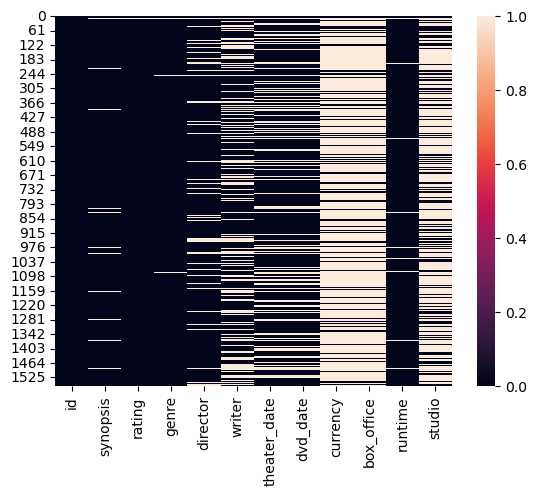

In [9]:
sns.heatmap(data.isnull())

**GET PERCENTAGE OF MISSING VALUES PER COLUMN**

In [10]:
df = pd.DataFrame(data)
per_missingdata = df.isna().mean() * 100
per_missingdata

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

**DROP THE MISSING VALUES**

In [11]:
df_dropped = df.dropna()

**CONFIRM ROWS WITH MISSING DATA HAVE BEEN DROPPED**

In [12]:
df_dropped.shape

(235, 12)

**CHECK FOR DUPLICATE VALUES**

In [13]:
duplicate_data = df_dropped.duplicated().any()

In [14]:
print(duplicate_data)

False


**GET GENERAL STATISCTICS FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS OF THE DATASET**

In [15]:
df_dropped.describe( include='all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,235.000000,235,235,235,235,235,235,235,235,235,235,235
unique,NaN,235,6,76,217,232,209,210,1,235,69,101
top,NaN,"New York City, not-too-distant-future: Eric Pa...",R,Drama,Clint Eastwood,Mike White,"Nov 18, 2016","Nov 4, 2014",$,"600,000",91 minutes,Universal Pictures
freq,NaN,1,105,33,3,2,3,4,235,1,10,23
mean,1010.217021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,578.522979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,488.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1044.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1526.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_dropped.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

**CONVERT DATA TYPES FOR BOX OFFICE AND RUNTIME COLUMNS TO FLOATS**



In [17]:
df = pd.DataFrame(data)
df['box_office'] = df['box_office'] = pd.to_numeric(df['box_office'].str.replace(',', ''))
df['runtime'] = df['runtime'].str.extract('(\d+)').astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    float64
 10  runtime       1530 non-null   float64
 11  studio        494 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 146.4+ KB


**RANK TOP 10 MOVIES BY BOX OFFICE SALES**

In [19]:
top_10_by_box_office = df.sort_values(by='box_office', ascending=False).head(10)

In [21]:
top_10_by_box_office

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
827,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000.0,127.0,Newmarket Film Group
877,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229.0,170.0,Warner Bros.
1188,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000.0,145.0,MGM
690,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575.0,118.0,Universal Pictures
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892.0,161.0,Warner Bros. Pictures
966,1255,Mission: Impossible III director and Alias cre...,PG-13,Action and Adventure|Drama|Science Fiction and...,NaN,Gene Roddenberry|Alex Kurtzman|Roberto Orci,"May 7, 2009","Nov 17, 2009",$,257704099.0,127.0,IMAX
504,661,One woman's rocky road to the altar gets playe...,PG,Comedy|Romance,Joel Zwick,Nia Vardalos,"Apr 19, 2002","Feb 11, 2003",$,241250669.0,95.0,IFC Films
657,841,This is a contemporary retelling of H.G. Wells...,PG-13,Action and Adventure|Science Fiction and Fantasy,Steven Spielberg,Josh Friedman|David Koepp,"Jun 29, 2005","Nov 22, 2005",$,234141872.0,117.0,Paramount Pictures
1458,1877,A hard-drinking lush finds himself thrust into...,PG-13,Action and Adventure|Comedy|Drama,Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,"Jun 16, 2008","Nov 25, 2008",$,227946274.0,92.0,Columbia Pictures
1237,1600,When a failed assassination attempt occurs on ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Bryan Singer,Daniel Harris|Dan Harris|Michael Dougherty|Bry...,"May 2, 2003","Nov 25, 2003",$,214813155.0,134.0,20th Century Fox


**DISPLAY TOP 10 MOVIES WITH HIGHEST BOX OFFICE SALES**

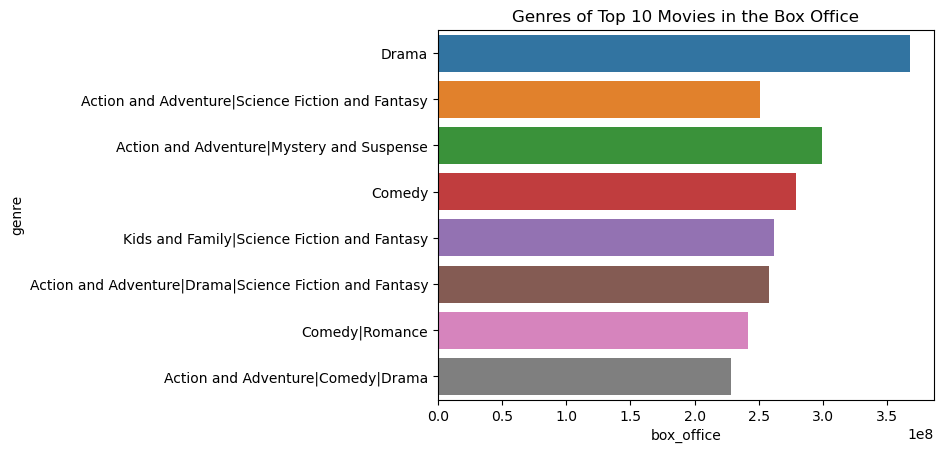

In [22]:
sns.barplot( y= 'genre', x = 'box_office', data = top_10_by_box_office,errorbar=None)
plt.title('Genres of Top 10 Movies in the Box Office')
plt.show()

**SHOW DIRECTORS OF TOP 10 MOVIES IN THE BOX OFFICE**

In [23]:
top_10_by_box_office = df.sort_values(by='box_office', ascending=False).head(10) [['director','genre','box_office']]

In [24]:
top_10_by_box_office 

,director,genre,box_office
827,Mel Gibson,Drama,368000000.0
877,Peter Jackson,Action and Adventure|Science Fiction and Fantasy,303001229.0
1188,Sam Mendes,Action and Adventure|Mystery and Suspense,299300000.0
690,Jay Roach,Comedy,279167575.0
1117,Chris Columbus,Kids and Family|Science Fiction and Fantasy,261835892.0
966,NaN,Action and Adventure|Drama|Science Fiction and...,257704099.0
504,Joel Zwick,Comedy|Romance,241250669.0
657,Steven Spielberg,Action and Adventure|Science Fiction and Fantasy,234141872.0
1458,Peter Berg,Action and Adventure|Comedy|Drama,227946274.0
1237,Bryan Singer,Action and Adventure|Science Fiction and Fantasy,214813155.0


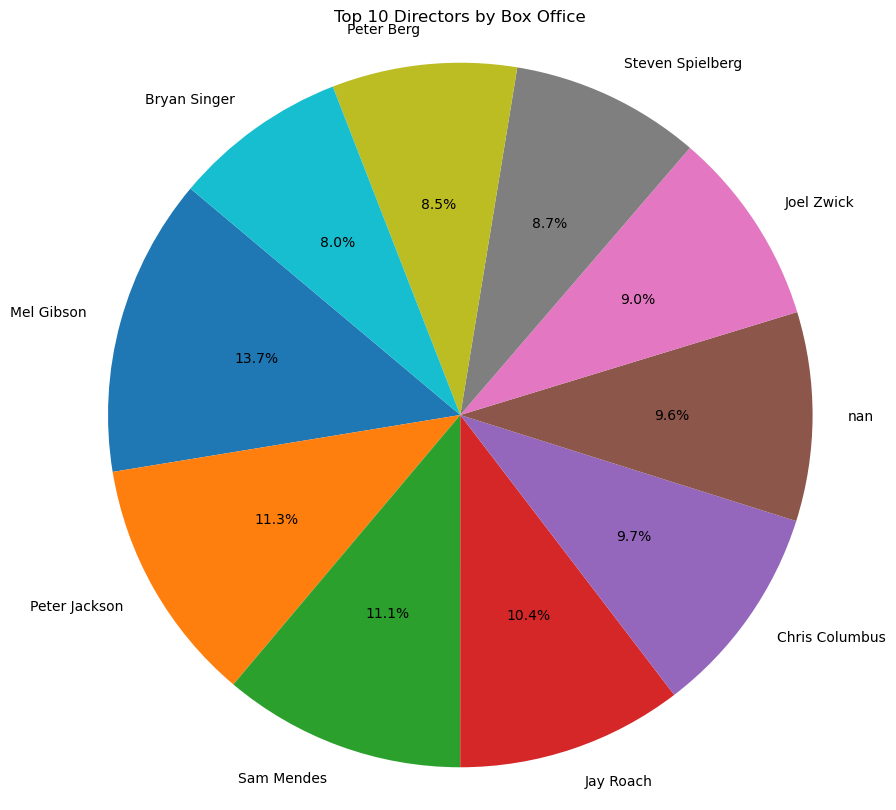

In [25]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_by_box_office['box_office'], labels=top_10_by_box_office['director'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Top 10 Directors by Box Office')
plt.axis('equal')
plt.show()

**GET THE AVERAGE RUNTIME OF TOP 100 MOVIES IN THE BOX OFFICE**

In [26]:
top_100_by_box_office = df.sort_values(by='box_office', ascending=False).head(100) [['director','genre','box_office','runtime']]

In [27]:
average_runtime = top_100_by_box_office['runtime'].mean()

In [28]:
average_runtime

109.34343434343434

**READ DATA SET FOR TN MOVIE BUDGETS**

In [29]:
data = pd.read_csv('tn.movie_budgets.csv.gz')

**DISPLAY FIRST FIVE ROWS OF TN MOVIES DATASET**

In [30]:
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**GET INFORMATION ON THE DATASET**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [32]:
df = pd.DataFrame(data) 
df.shape

(5782, 6)

**CHECK FOR MISSING VALUES IN THE DATA SET**

In [33]:
data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

**CHECK FOR DUPLICATE VALUES**

In [34]:
duplicate_data = data.duplicated().any()
print(duplicate_data)


False


In [35]:
data.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

**CONVERT DATATYPES FOR RELEVANT COLUMNS FROM OBJECTS TO INTEGERS**

In [36]:
df = pd.DataFrame(data)
df['production_budget'] =  pd.to_numeric(df['production_budget'].str.replace(',', '').str.replace('$', ''))
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].str.replace(',', '').str.replace('$', ''))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].str.replace(',', '').str.replace('$', ''))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


**GET GENERAL STATISCTICS FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS OF THE DATASET**

In [38]:
df.describe( include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03
unique,NaN,2418,5698,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",Halloween,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07


**GET THE AVERAGE PROFITABILITY OF MAKING MOVIES**

In [39]:
df['percentage_profit_margin'] = ((df['worldwide_gross'] - df['production_budget']) / df['production_budget']) * 100

In [40]:
df.describe( include='all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_profit_margin
count,5782.000000,5782,5782,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
unique,NaN,2418,5698,NaN,NaN,NaN,NaN
top,NaN,"Dec 31, 2014",Halloween,NaN,NaN,NaN,NaN
freq,NaN,24,3,NaN,NaN,NaN,NaN
mean,50.372363,NaN,NaN,3.158776e+07,4.187333e+07,9.148746e+07,380.016137
std,28.821076,NaN,NaN,4.181208e+07,6.824060e+07,1.747200e+08,2953.028231
min,1.000000,NaN,NaN,1.100000e+03,0.000000e+00,0.000000e+00,-100.000000
25%,25.000000,NaN,NaN,5.000000e+06,1.429534e+06,4.125415e+06,-50.770440
50%,50.000000,NaN,NaN,1.700000e+07,1.722594e+07,2.798445e+07,70.830983
75%,75.000000,NaN,NaN,4.000000e+07,5.234866e+07,9.764584e+07,275.834608


**CHECK FOR NAN AND INF VALUES IN PERCENTAGE_PROFIT_MARGIN COLUMN**

In [41]:
nan_values = df['percentage_profit_margin'].isna()
print(df[nan_values])

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross, percentage_profit_margin]
Index: []


In [42]:
inf_values = df['percentage_profit_margin'] == np.inf
print(df[inf_values])

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross, percentage_profit_margin]
Index: []


In [43]:
average_profit = df['percentage_profit_margin'].mean()
print("The average profit margin for movies is", average_profit ,"percent")

The average profit margin for movies is 380.01613657949645 percent


**SHOW COORELATION BETWEEN PRODUCTION COST AND PROFITABILITY**

In [44]:
df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'percentage_profit_margin'],
      dtype='object')

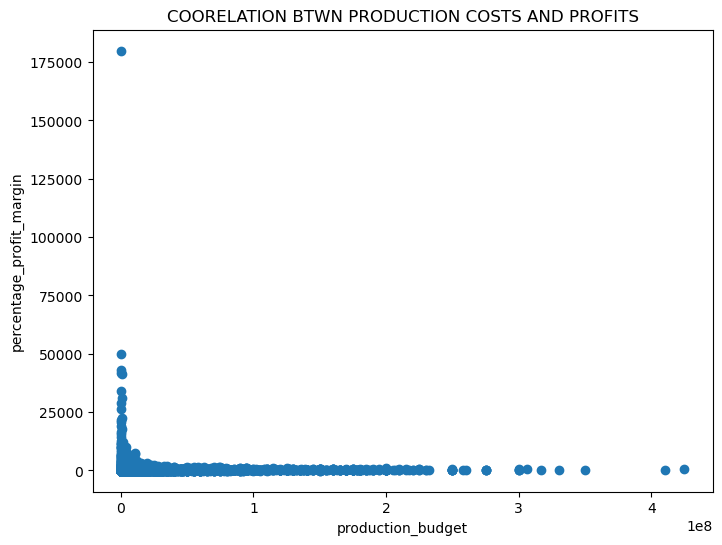

In [45]:
x = df['production_budget']
y = df['percentage_profit_margin']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=1)
plt.xlabel('production_budget')
plt.ylabel('percentage_profit_margin')
plt.title('COORELATION BTWN PRODUCTION COSTS AND PROFITS')
plt.show()

**GET AVERAGE PRODUCTION BUDGET FOR TOP 100 MOST PROFITABLE MOVIES**

In [46]:
top_100_Prof_mvs = df.sort_values(by='percentage_profit_margin', ascending=False).head(100)
top_100_Prof_mvs


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percentage_profit_margin
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,179900.000000
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49775.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43051.785333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41283.333333
...,...,...,...,...,...,...,...
3985,86,"Dec 5, 2007",Juno,7000000,143495265,231450102,3206.430029
4252,53,"Sep 13, 2013",Insidious Chapter 2,5000000,83586447,161921515,3138.430300
2991,92,"Nov 16, 1990",Home Alone,15000000,285761243,476684675,3077.897833
3755,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3001.627558


In [47]:
average_prod_budget = top_100_Prof_mvs['production_budget'].mean()
average_prod_budget 

2381713.47

**READ DATA FOR  TMDB MOVIES AND TN MOVIES DATA SETS**

In [48]:
df1 = pd.read_csv('tmdb.movies.csv.gz')
df2 = pd.read_csv('tn.movie_budgets.csv.gz')

**RENAME ONE OF THE COLUMNS AND JOIN THE TWO DATA SETS **

In [49]:
df2 = df2.rename(columns={'movie': 'title'})

In [50]:
merged_df = pd.merge(df1, df2, on=['title'])

**DISPLAY FIRST FIVE ROWS OF THE JOINED DATA SET**

In [51]:
merged_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"


**GET INFORMATION ON  DATA TYPES OF EACH COLUMN IN THE DATASET**

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2385 non-null   int64  
 1   genre_ids          2385 non-null   object 
 2   id_x               2385 non-null   int64  
 3   original_language  2385 non-null   object 
 4   original_title     2385 non-null   object 
 5   popularity         2385 non-null   float64
 6   release_date_x     2385 non-null   object 
 7   title              2385 non-null   object 
 8   vote_average       2385 non-null   float64
 9   vote_count         2385 non-null   int64  
 10  id_y               2385 non-null   int64  
 11  release_date_y     2385 non-null   object 
 12  production_budget  2385 non-null   object 
 13  domestic_gross     2385 non-null   object 
 14  worldwide_gross    2385 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 279.6+ KB


**CONVERT DATATYPES FOR RELEVANT COLUMNS FROM OBJECTS TO INTEGERS**

In [53]:
df = pd.DataFrame(merged_df)
df['production_budget'] =  pd.to_numeric(df['production_budget'].str.replace(',', '').str.replace('$', ''))
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].str.replace(',', '').str.replace('$', ''))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].str.replace(',', '').str.replace('$', ''))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2385 non-null   int64  
 1   genre_ids          2385 non-null   object 
 2   id_x               2385 non-null   int64  
 3   original_language  2385 non-null   object 
 4   original_title     2385 non-null   object 
 5   popularity         2385 non-null   float64
 6   release_date_x     2385 non-null   object 
 7   title              2385 non-null   object 
 8   vote_average       2385 non-null   float64
 9   vote_count         2385 non-null   int64  
 10  id_y               2385 non-null   int64  
 11  release_date_y     2385 non-null   object 
 12  production_budget  2385 non-null   int64  
 13  domestic_gross     2385 non-null   int64  
 14  worldwide_gross    2385 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 279.6+ KB


**GET INFORMATION ON NUMBER OF ROWS AND COLUMNS IN THE DATASET**

In [55]:
df = pd.DataFrame(df) 
df.shape

(2385, 15)

**CHECK FOR MISSING VALUES IN THE DATA SET**

In [56]:
df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

**CHECK FOR DUPLICATE VALUES IN THE DATASET**

In [57]:
duplicate_data = df.duplicated().any()
print(duplicate_data)

False


**GET GENERAL STATISCTICS FOR BOTH NUMERICAL AND CATEGORICAL COLUMNS OF THE DATASET**

In [58]:
df.describe( include='all')

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
count,2385.000000,2385,2385.000000,2385,2385,2385.000000,2385,2385,2385.000000,2385.000000,2385.000000,2385,2.385000e+03,2.385000e+03,2.385000e+03
unique,NaN,674,NaN,32,1968,NaN,1046,1924,NaN,NaN,NaN,887,NaN,NaN,NaN
top,NaN,[18],NaN,en,Home,NaN,2015-10-16,Home,NaN,NaN,NaN,"Nov 20, 2015",NaN,NaN,NaN
freq,NaN,225,NaN,2255,18,NaN,15,21,NaN,NaN,NaN,17,NaN,NaN,NaN
mean,11491.000000,NaN,212160.239413,NaN,NaN,10.423104,NaN,NaN,6.202474,1662.224738,50.990776,NaN,3.772410e+07,4.948916e+07,1.199040e+08
std,7549.622509,NaN,144783.690432,NaN,NaN,8.257018,NaN,NaN,1.184930,2681.183078,28.500793,NaN,5.125635e+07,8.275210e+07,2.213221e+08
min,1.000000,NaN,62.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000,1.000000,NaN,9.000000e+03,0.000000e+00,0.000000e+00
25%,5215.000000,NaN,72431.000000,NaN,NaN,4.749000,NaN,NaN,5.600000,48.000000,27.000000,NaN,5.000000e+06,8.818240e+05,3.187302e+06
50%,11177.000000,NaN,209702.000000,NaN,NaN,9.329000,NaN,NaN,6.300000,563.000000,51.000000,NaN,1.900000e+07,2.015730e+07,3.704853e+07
75%,17551.000000,NaN,332979.000000,NaN,NaN,14.239000,NaN,NaN,6.900000,2047.000000,76.000000,NaN,4.500000e+07,5.789180e+07,1.233688e+08


**DISPLAY TOP 1000 MOVIES RANKED  ON POPULARITY AND CATEGORIZED BY  ORIGINAL LANGUAGE**

In [59]:
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'id_y', 'release_date_y',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [60]:
top_1000_Pop_mvs = df.sort_values(by='popularity', ascending=False).head(1000)
top_1000_Pop_mvs 

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
2251,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,7,"Apr 27, 2018",300000000,678815482,2048134200
1227,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,6,"Oct 24, 2014",30000000,43037835,76235001
1228,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,22,"Dec 17, 2014",250000000,255119788,945577621
683,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,27,"May 4, 2012",225000000,623279547,1517935897
684,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,35,"Aug 14, 1998",60000000,23385416,48585416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,17547,"[12, 14]",11976,en,Legend,10.542,1986-04-18,Legend,6.2,509,63,"Apr 18, 1986",25000000,15502112,23506237
1948,17548,"[18, 53]",329981,en,Shut In,10.535,2016-11-11,Shut In,5.2,374,50,"Nov 11, 2016",10000000,6900335,11360665
927,24138,"[10751, 80, 18]",495193,en,Benji,10.503,2018-03-02,Benji,7.0,138,30,"Nov 15, 1974",500000,31559560,31559560
1338,11163,"[16, 35, 10751, 12]",227783,en,The Nut Job,10.501,2014-01-17,The Nut Job,5.6,529,72,"Jan 17, 2014",30000000,64251538,122529966


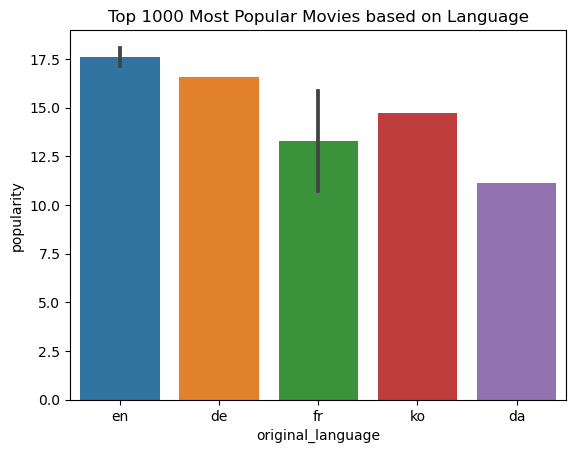

In [61]:
sns.barplot( y= 'popularity', x = 'original_language', data = top_1000_Pop_mvs,)
plt.title('Top 1000 Most Popular Movies based on Language')
plt.show()

data = pd.read_table('rt.movie_info.tsv.gz')